       Dates    Xt       Yt
0 2025-09-19  33.4  1.17456
1 2025-09-12  25.1  1.17252
2 2025-09-05  31.4  1.17367
3 2025-08-29  38.8  1.17046
4 2025-08-22  51.3  1.17183

Statistiques descriptives :
               Xt          Yt
count  521.000000  521.000000
mean    10.347601    1.119038
std    111.069415    0.053545
min   -499.700000    0.970475
25%    -51.400000    1.082410
50%     15.100000    1.116100
75%     64.700000    1.161800
max    372.800000    1.244800

Corrélation de Pearson : 0.3047, p-value : 0.0000

Résumé régression linéaire :
                            OLS Regression Results                            
Dep. Variable:                     Yt   R-squared:                       0.093
Model:                            OLS   Adj. R-squared:                  0.091
Method:                 Least Squares   F-statistic:                     53.10
Date:                Sun, 21 Sep 2025   Prob (F-statistic):           1.19e-12
Time:                        19:32:37   Log-Likelihood:  

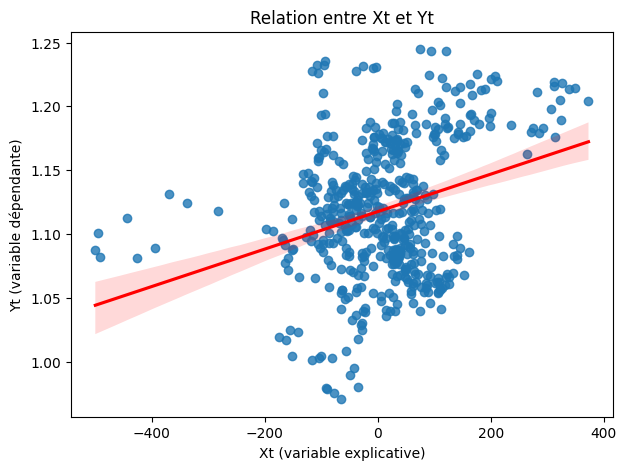

In [ ]:
# --- 1. Import packages ---
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import pearsonr


df = pd.read_excel("Book2.xlsx", sheet_name="Sheet1")
print(df.head())

print("\nStatistiques descriptives :")
print(df[["Xt","Yt"]].describe())

corr, pval = pearsonr(df["Xt"], df["Yt"])
print(f"\nCorrélation de Pearson : {corr:.4f}, p-value : {pval:.4f}")

X = sm.add_constant(df["Xt"])   # Ajout constante
y = df["Yt"]

model = sm.OLS(y, X).fit()
print("\nRésumé régression linéaire :")
print(model.summary())

plt.figure(figsize=(7,5))
sns.regplot(x="Xt", y="Yt", data=df, ci=95, line_kws={"color":"red"})
plt.title("Relation entre Xt et Yt")
plt.xlabel("Xt (variable explicative)")
plt.ylabel("Yt (variable dépendante)")
plt.show()

In [4]:
import statsmodels.api as sm
X = sm.add_constant(df["Xt"])
y = df["Yt"]
ols = sm.OLS(y, X).fit(cov_type="HAC", cov_kwds={"maxlags":4})  # ~1 mois hebdo
print(ols.summary())

                            OLS Regression Results                            
Dep. Variable:                     Yt   R-squared:                       0.093
Model:                            OLS   Adj. R-squared:                  0.091
Method:                 Least Squares   F-statistic:                     12.51
Date:                Sun, 21 Sep 2025   Prob (F-statistic):           0.000442
Time:                        19:34:18   Log-Likelihood:                 811.70
No. Observations:                 521   AIC:                            -1619.
Df Residuals:                     519   BIC:                            -1611.
Df Model:                           1                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.1175      0.005    228.207      0.0

In [5]:
from statsmodels.tsa.stattools import adfuller
for col in ["Xt","Yt"]:
    adf = adfuller(df[col].dropna(), autolag="AIC")
    print(col, "ADF stat:", round(adf[0],3), "p-val:", round(adf[1],3))

# Si non stationnaires, travailler en Δ
d = df[["Xt","Yt"]].diff().dropna()
X = sm.add_constant(d["Xt"])
y = d["Yt"]
ols_d = sm.OLS(y, X).fit(cov_type="HAC", cov_kwds={"maxlags":4})
print(ols_d.summary())


Xt ADF stat: -3.687 p-val: 0.004
Yt ADF stat: -2.749 p-val: 0.066
                            OLS Regression Results                            
Dep. Variable:                     Yt   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.6290
Date:                Sun, 21 Sep 2025   Prob (F-statistic):              0.428
Time:                        19:34:31   Log-Likelihood:                 1589.9
No. Observations:                 520   AIC:                            -3176.
Df Residuals:                     518   BIC:                            -3167.
Df Model:                           1                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------

In [6]:
import pandas as pd
Z = df.copy()
for k in [1,2,3,4]:  # 1 à 4 semaines de lag
    Z[f"Xt_lag{k}"] = Z["Xt"].shift(k)
Z = Z.dropna()
X = sm.add_constant(Z[["Xt_lag1","Xt_lag2","Xt_lag3","Xt_lag4"]])
y = Z["Yt"]
lag_model = sm.OLS(y, X).fit(cov_type="HAC", cov_kwds={"maxlags":4})
print(lag_model.summary())


                            OLS Regression Results                            
Dep. Variable:                     Yt   R-squared:                       0.090
Model:                            OLS   Adj. R-squared:                  0.083
Method:                 Least Squares   F-statistic:                     3.248
Date:                Sun, 21 Sep 2025   Prob (F-statistic):             0.0120
Time:                        19:34:43   Log-Likelihood:                 804.69
No. Observations:                 517   AIC:                            -1599.
Df Residuals:                     512   BIC:                            -1578.
Df Model:                           4                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.1171      0.005    226.880      0.0

<Axes: title={'center': 'Rolling 90-obs correlation Xt vs Yt'}>

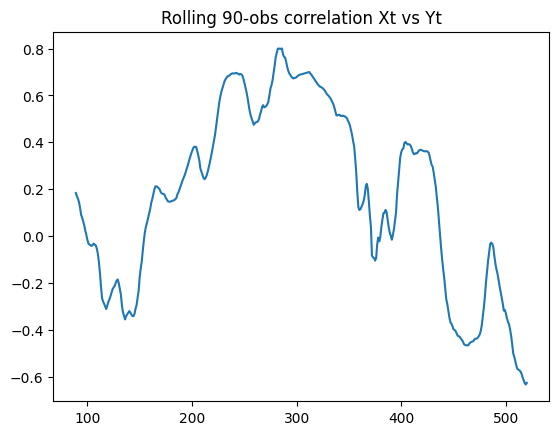

In [7]:
roll_corr = df["Xt"].rolling(90).corr(df["Yt"])  # ~90 obs hebdo ≈ 2 ans
roll_corr.plot(title="Rolling 90-obs correlation Xt vs Yt")

In [9]:
from scipy.stats import spearmanr
rho, p = spearmanr(df["Xt"], df["Yt"], nan_policy="omit")
print("Spearman rho:", round(rho,3), "p-val:", round(p,4))

Spearman rho: 0.202 p-val: 0.0


ADF dXt: stat=-8.224, p=0.000
ADF dYt: stat=-9.357, p=0.000


d:\Python\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
d:\Python\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['error_variance']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
d:\Python\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
d:\Python\Lib\site-packages\numpy\core\fromnumeric.py:88: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


                        Markov Switching Model Results                        
Dep. Variable:                    dYt   No. Observations:                  520
Model:               MarkovRegression   Log Likelihood                     nan
Date:                Sun, 21 Sep 2025   AIC                                nan
Time:                        19:39:57   BIC                                nan
Sample:                    10-09-2015   HQIC                               nan
                         - 09-19-2025                                         
Covariance Type:               approx                                         
                             Regime 0 parameters                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         64.3398        nan        nan        nan         nan         nan
x1         -1014.3395        nan        nan        n

d:\Python\Lib\site-packages\numpy\core\fromnumeric.py:88: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
d:\Python\Lib\site-packages\numpy\core\fromnumeric.py:88: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
d:\Python\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


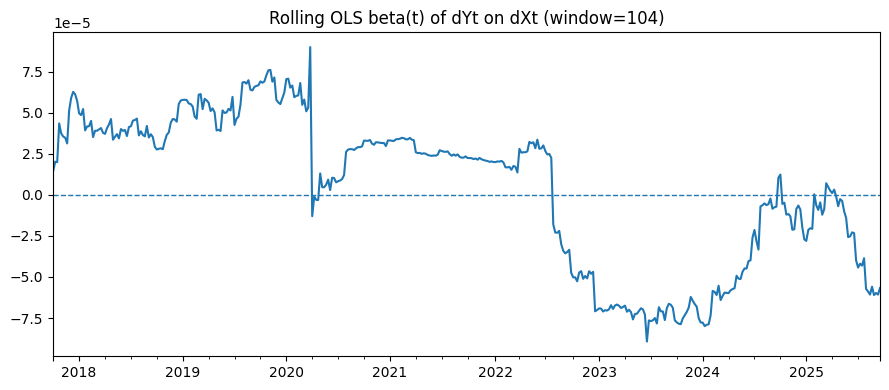

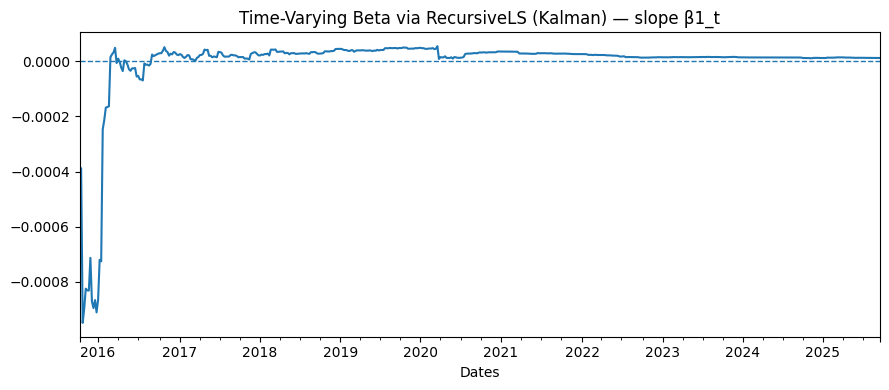

<Figure size 900x400 with 0 Axes>

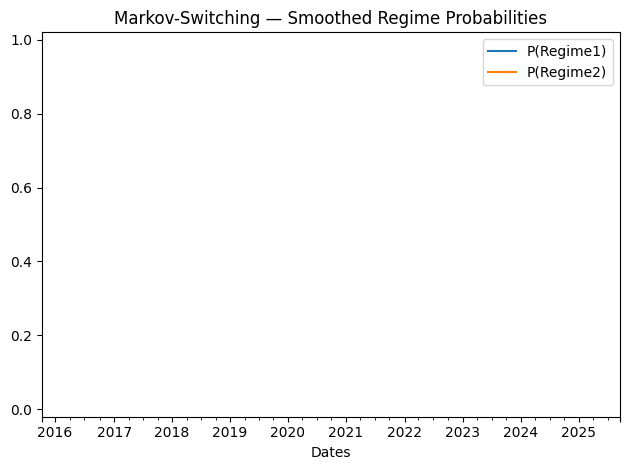


==== Quick takeaways ====
Rolling β median: 0.0000, 10–90%: -0.0001/0.0001
TVP β mean: -0.0000, std: 0.0001
Markov: see summary above — coefficients by regime and transition probabilities (Pij).

Share of time with strong positive beta (TVP top 30%): 30.0%


In [ ]:
# ============================
# Time-varying beta & Regimes
# ============================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.regression.recursive_ls import RecursiveLS
from statsmodels.tsa.regime_switching.markov_regression import MarkovRegression
from statsmodels.tsa.stattools import adfuller

# ---------- 1) DATA ----------
df = pd.read_excel("Book2.xlsx", sheet_name="Sheet1", parse_dates=["Dates"])
df = df.sort_values("Dates").set_index("Dates")[["Xt","Yt"]].dropna()

USE_DIFF = True  
if USE_DIFF:
    data = df.diff().dropna().rename(columns={"Xt":"dXt","Yt":"dYt"})
    Xcol, Ycol = "dXt", "dYt"
else:
    data = df.copy()
    Xcol, Ycol = "Xt", "Yt"

# Quick ADF check
for col in [Xcol, Ycol]:
    adf = adfuller(data[col].dropna(), autolag="AIC")
    print(f"ADF {col}: stat={adf[0]:.3f}, p={adf[1]:.3f}")

# ---------- 2) Rolling OLS β(t) ----------
W = 104  # fenêtre (≈ 2 ans si hebdo)
roll_beta = []
roll_idx = []

for t in range(W, len(data)):
    y = data[Ycol].iloc[t-W:t]
    x = data[Xcol].iloc[t-W:t]
    X = sm.add_constant(x)
    res = sm.OLS(y, X).fit()
    roll_beta.append(res.params[Xcol])
    roll_idx.append(data.index[t])

roll_beta = pd.Series(roll_beta, index=pd.DatetimeIndex(roll_idx), name="beta_rolling")

# ---------- 3) TVP β(t) via RecursiveLS (Kalman) ----------
# Modèle: Yt = β0_t + β1_t * Xt + εt ; β_t suit un random walk
y = data[Ycol].astype(float)
X = sm.add_constant(data[Xcol].astype(float))
# RecursiveLS with time-varying coefficients for all regressors
tvp_mod = RecursiveLS(endog=y, exog=X, error_variance=True)  # time-varying params
tvp_res = tvp_mod.fit()  # par défaut, variance transition estimée
tvp_params = pd.DataFrame(tvp_res.filtered_state.T, index=data.index,
                          columns=["beta0_t","beta1_t"])

# ---------- 4) Markov-Switching (2 régimes) avec β qui change par régime ----------
# MarkovRegression supporte switching_exog=True : β_r par régime
# NB: endog univarié; exog = Xt
mr_mod = MarkovRegression(
    endog=y, exog=data[[Xcol]], k_regimes=2,
    trend='c', switching_trend=True, switching_exog=True, switching_variance=False
)
mr_res = mr_mod.fit(em_iter=50, search_reps=10, disp=False)

# Probabilités lissées d’être en régime 1/2
mr_probs = pd.DataFrame({
    "P(Regime1)": mr_res.smoothed_marginal_probabilities[0],
    "P(Regime2)": mr_res.smoothed_marginal_probabilities[1]
}, index=data.index)

# Coefficients par régime (constante + slope)
params = mr_res.params
print(mr_res.summary())

# ---------- 5) PLOTS ----------
plt.figure(figsize=(9,4))
roll_beta.plot()
plt.title(f"Rolling OLS beta(t) of {Ycol} on {Xcol} (window={W})")
plt.axhline(0, ls="--", lw=1)
plt.tight_layout()
plt.show()

plt.figure(figsize=(9,4))
tvp_params["beta1_t"].plot()
plt.title("Time-Varying Beta via RecursiveLS (Kalman) — slope β1_t")
plt.axhline(0, ls="--", lw=1)
plt.tight_layout()
plt.show()

plt.figure(figsize=(9,4))
mr_probs.plot()
plt.title("Markov-Switching — Smoothed Regime Probabilities")
plt.ylim(-0.02, 1.02)
plt.tight_layout()
plt.show()

print("\n==== Quick takeaways ====")
print(f"Rolling β median: {roll_beta.median():.4f}, 10–90%: "
      f"{roll_beta.quantile(0.1):.4f}/{roll_beta.quantile(0.9):.4f}")
print(f"TVP β mean: {tvp_params['beta1_t'].mean():.4f}, std: {tvp_params['beta1_t'].std():.4f}")
print("Markov: see summary above — coefficients by regime and transition probabilities (Pij).")

# Option: repérer les périodes où β(t) > 0 et significatif (proxy: top decile)
signal_window = (tvp_params["beta1_t"] > tvp_params["beta1_t"].quantile(0.7))
print(f"\nShare of time with strong positive beta (TVP top 30%): {signal_window.mean():.1%}")

In [ ]:
import pandas as pd, numpy as np, statsmodels.api as sm
from statsmodels.tsa.regime_switching.markov_regression import MarkovRegression

df = pd.read_excel("Book2.xlsx", sheet_name="Sheet1", parse_dates=["Dates"]).sort_values("Dates")
df = df.set_index("Dates")[["Xt","Yt"]].dropna()

# rendements/log-diff et mise en bp pour num stable
dYt = 10000*np.log(df["Yt"]).diff().dropna()   # EUR/USD en basis points
dXt = 10000*df["Xt"].diff().reindex(dYt.index) # même alignement (ou z-score ci-dessous)

# OPTION z-score (souvent encore plus stable)
dYz = (dYt - dYt.mean())/dYt.std()
dXz = (dXt - dXt.mean())/dXt.std()

y = dYz.values
X = dXz.values.reshape(-1,1)

# --- 2) Démarrage: OLS pour init params ---
Xc = sm.add_constant(X)
ols = sm.OLS(y, Xc).fit()
beta0, beta1 = ols.params

# --- 3) Markov-Switching simple (2 régimes), pente qui switch, variance non-switchée ---
# trend='c' + switching_trend=False -> intercept commun
mr = MarkovRegression(endog=y, exog=X, k_regimes=2,
                      trend='c', switching_trend=False,
                      switching_exog=True,    # β1^regime
                      switching_variance=False)
res = mr.fit(start_params=None, em_iter=30, search_reps=10, maxiter=200, disp=False)
print(res.summary())

probs = res.smoothed_marginal_probabilities    # DataFrame P(Regime i)
p1 = probs[0]; p2 = probs[1]

# --- 4) (Option) Variante: intercept qui switch, pente commune ---
mr2 = MarkovRegression(endog=y, exog=X, k_regimes=2,
                       trend='c', switching_trend=True,   # c^regime
                       switching_exog=False,               # β1 commun
                       switching_variance=False)
res2 = mr2.fit(em_iter=30, search_reps=10, maxiter=200, disp=False)
print(res2.summary())

                        Markov Switching Model Results                        
Dep. Variable:                      y   No. Observations:                  520
Model:               MarkovRegression   Log Likelihood                -733.794
Date:                Sun, 21 Sep 2025   AIC                           1479.588
Time:                        19:41:21   BIC                           1505.111
Sample:                             0   HQIC                          1489.586
                                - 520                                         
Covariance Type:               approx                                         
                             Regime 0 parameters                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0871      0.055      1.590      0.112      -0.020       0.194
                             Regime 1 parameters    

# 📑 Conclusion – EUR/USD et indices de surprises économiques

Notre analyse empirique du lien entre **EUR/USD** et le **Citi Economic Surprise Index (CESI) – Eurozone** révèle une réalité plus nuancée que ce que l’intuition suggère.

---

## 🔄 Relation instable dans le temps
- Corrélation moyenne modeste (~0,30) ; la régression en niveau n’explique qu’environ **9 %** de la variance.  
- Les corrélations roulantes alternent entre phases positives et négatives (**+0,8 à –0,6**).  
- Le modèle **Markov-Switching** confirme que le lien n’apparaît que dans certains contextes :  
  - un régime où les surprises économiques pèsent significativement sur l’euro,  
  - un autre où le signal disparaît.  

---

## 🌍 Explication macro-économique
- L’EUR/USD **ne réagit pas mécaniquement** aux surprises économiques de la zone euro.  
- Ce qui compte, c’est le **différentiel de surprises US–Eurozone** : un rebond du CESI européen n’a d’impact que s’il s’accompagne d’une déception relative aux États-Unis.  
- Les dynamiques de change sont amplifiées ou neutralisées par :  
  - **Écarts de taux 2 ans UST–Bund**, reflet des anticipations de politique monétaire,  
  - **Régime de risque global** (flight-to-quality qui soutient le dollar refuge),  
  - **Chocs énergétiques**, particulièrement asymétriques pour l’Europe.  

---

## 🎯 Implications stratégiques
- Les indices de surprises économiques restent utiles, mais leur lecture doit être **relative et contextuelle**.  
- Pour anticiper les mouvements de l’EUR/USD, il est plus pertinent de suivre :  
  - Le spread **CESI_Eurozone – CESI_US**,  
  - Le **différentiel de taux courts (2Y UST–Bund)**,  
  - Les **indicateurs de risque global** (VIX, spreads de crédit).  

En d’autres termes, l’EUR/USD est davantage un **baromètre des différentiels transatlantiques et du climat de risque** qu’un simple miroir des données européennes.  

---

👉 **Conclusion finale :**  
Les surprises économiques européennes, isolées, n’offrent pas de pouvoir prédictif robuste sur l’EUR/USD.  
C’est leur interaction avec les surprises américaines et les différentiels de taux qui détermine la trajectoire du change.  
Autrement dit, le marché FX arbitre en permanence les deux blocs, plutôt que de réagir mécaniquement à un seul.


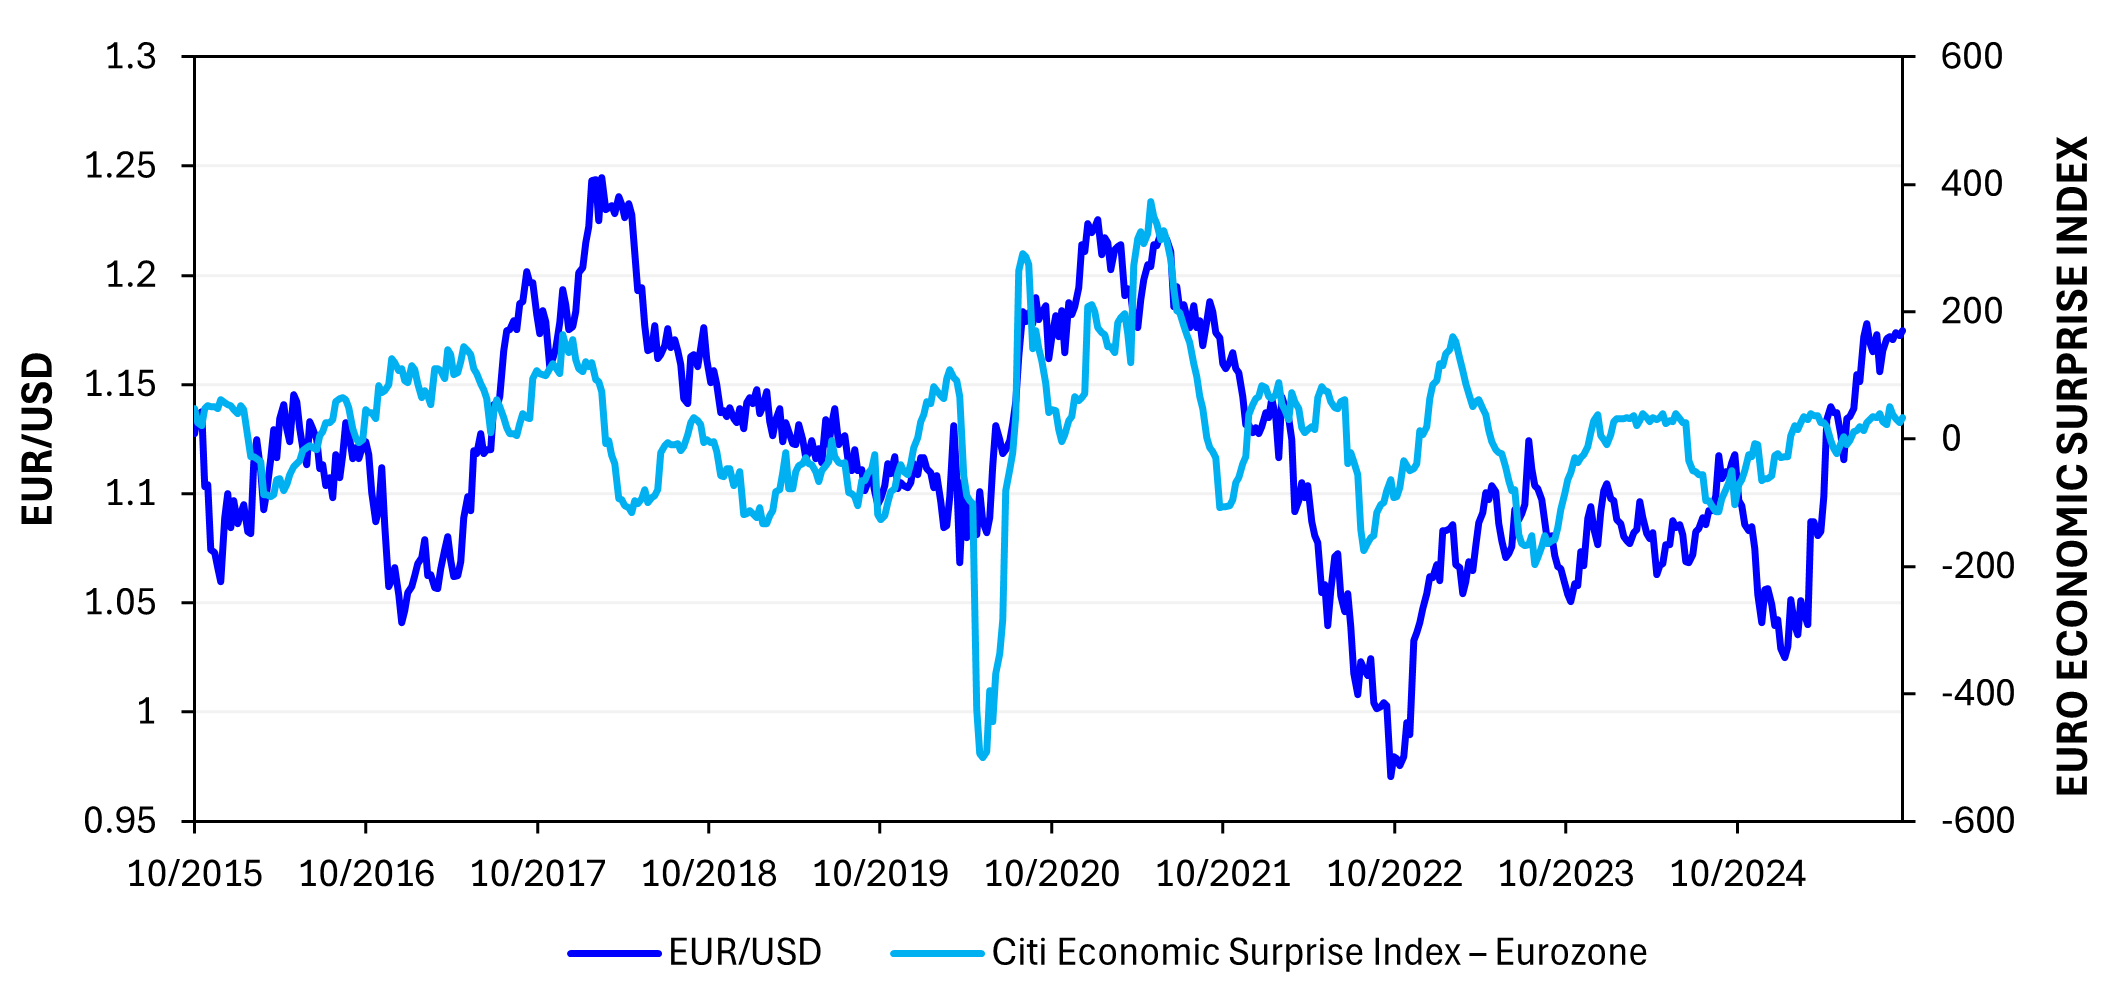